# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

df = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
1527,7.1,0.530,0.07,1.7,0.071,15.0,24.0,0.99510,3.29,0.66,10.8,6
866,6.8,0.490,0.22,2.3,0.071,13.0,24.0,0.99438,3.41,0.83,11.3,6
873,9.1,0.210,0.37,1.6,0.067,6.0,10.0,0.99552,3.23,0.58,11.1,7
857,8.2,0.260,0.34,2.5,0.073,16.0,47.0,0.99594,3.40,0.78,11.3,7
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,4
985,7.4,0.580,0.00,2.0,0.064,7.0,11.0,0.99562,3.45,0.58,11.3,6
1448,6.9,0.580,0.01,1.9,0.080,40.0,54.0,0.99683,3.40,0.73,9.7,5
895,7.1,0.590,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,6
793,7.7,0.600,0.00,2.6,0.055,7.0,13.0,0.99639,3.38,0.56,10.8,5
1309,7.0,0.620,0.10,1.4,0.071,27.0,63.0,0.99600,3.28,0.61,9.2,5


In [4]:
# Check if any columns have any missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64

In [5]:
#After using isnull(), no rows have any missing data. Therefore, i dont need to handle missing values (.dropna()).

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [6]:
# YOUR CODE HERE
print(list(df.columns))



['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']


YOUR ANSWERS HERE

In [7]:
'''
fixed acidity - The acids that stay in the wine.
volatile acidity - The acids that kind of evaporate and affect the smell.
citric acid - A little bit of citrus type acid for freshness.
residual sugar - The leftover sugar after it terments.
chlorides - The salt level.
free sulfur dioxide - The active sulfure dioxide chemical that protects the wine.
total sulfur dioxide - All the sulfure dioaxide in the wine combined.
density - How heavy the wine is compared to water.
pH - The overall acidity level.
sulphates - The stuff that helps with stability and aroma.
alcohol - The alcohol percent.
target - The quality score of the wine.
'''

'\nfixed acidity - The acids that stay in the wine.\nvolatile acidity - The acids that kind of evaporate and affect the smell.\ncitric acid - A little bit of citrus type acid for freshness.\nresidual sugar - The leftover sugar after it terments.\nchlorides - The salt level.\nfree sulfur dioxide - The active sulfure dioxide chemical that protects the wine.\ntotal sulfur dioxide - All the sulfure dioaxide in the wine combined.\ndensity - How heavy the wine is compared to water.\npH - The overall acidity level.\nsulphates - The stuff that helps with stability and aroma.\nalcohol - The alcohol percent.\ntarget - The quality score of the wine.\n'

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [8]:
# YOUR CODE HERE
#This dataset has 1,599 rows (observations) and 12 columns (Features).
df.shape

(1599, 12)

In [9]:
#All features are numeric and no missing values exist.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
#The residual sugar range is wide, its range is min .9 to max 15.5g but looking at the percentiles, 75% is 2.6, which tells me very few values are 15+.
#Similar to residual sugar, total sulfure dioxide follows a similar story. It has a wide range with a mean of 46 but a max of 289.

# the target has a value has a mean 5.6 with a standard deviation of .8, which tell me the scores do not spread out very far? Most of the wines vall within plus/min .8 of the mean.
#The target also ranges from 3 to 8, with a low std, this shows most wines are between 5-6, This concentrations around the 5-6, tells me my data might be imbalanced.

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df_corr = df.corr(numeric_only=True)
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


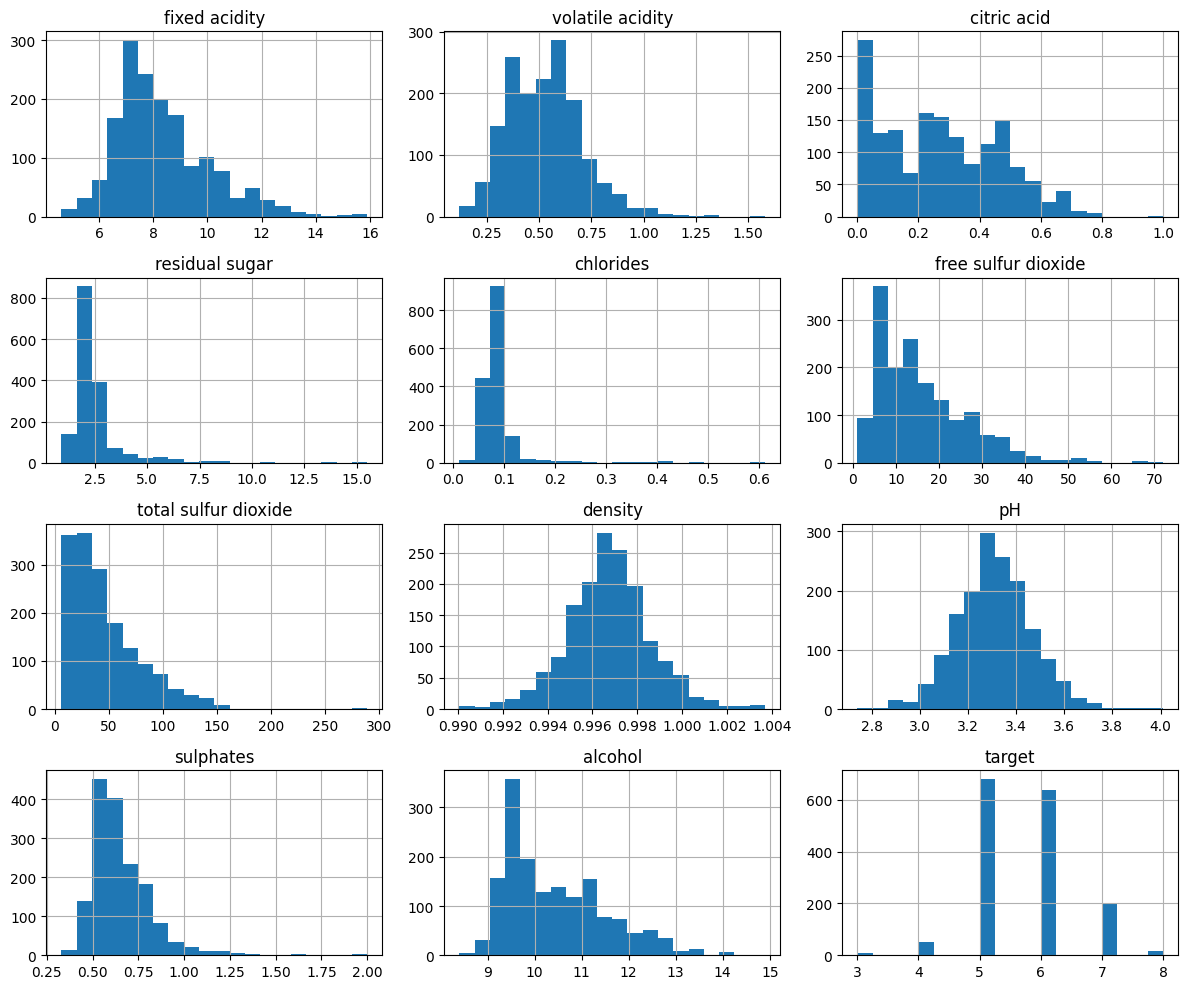

In [12]:
#Lets explore the distribution of the variable to understand them.
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

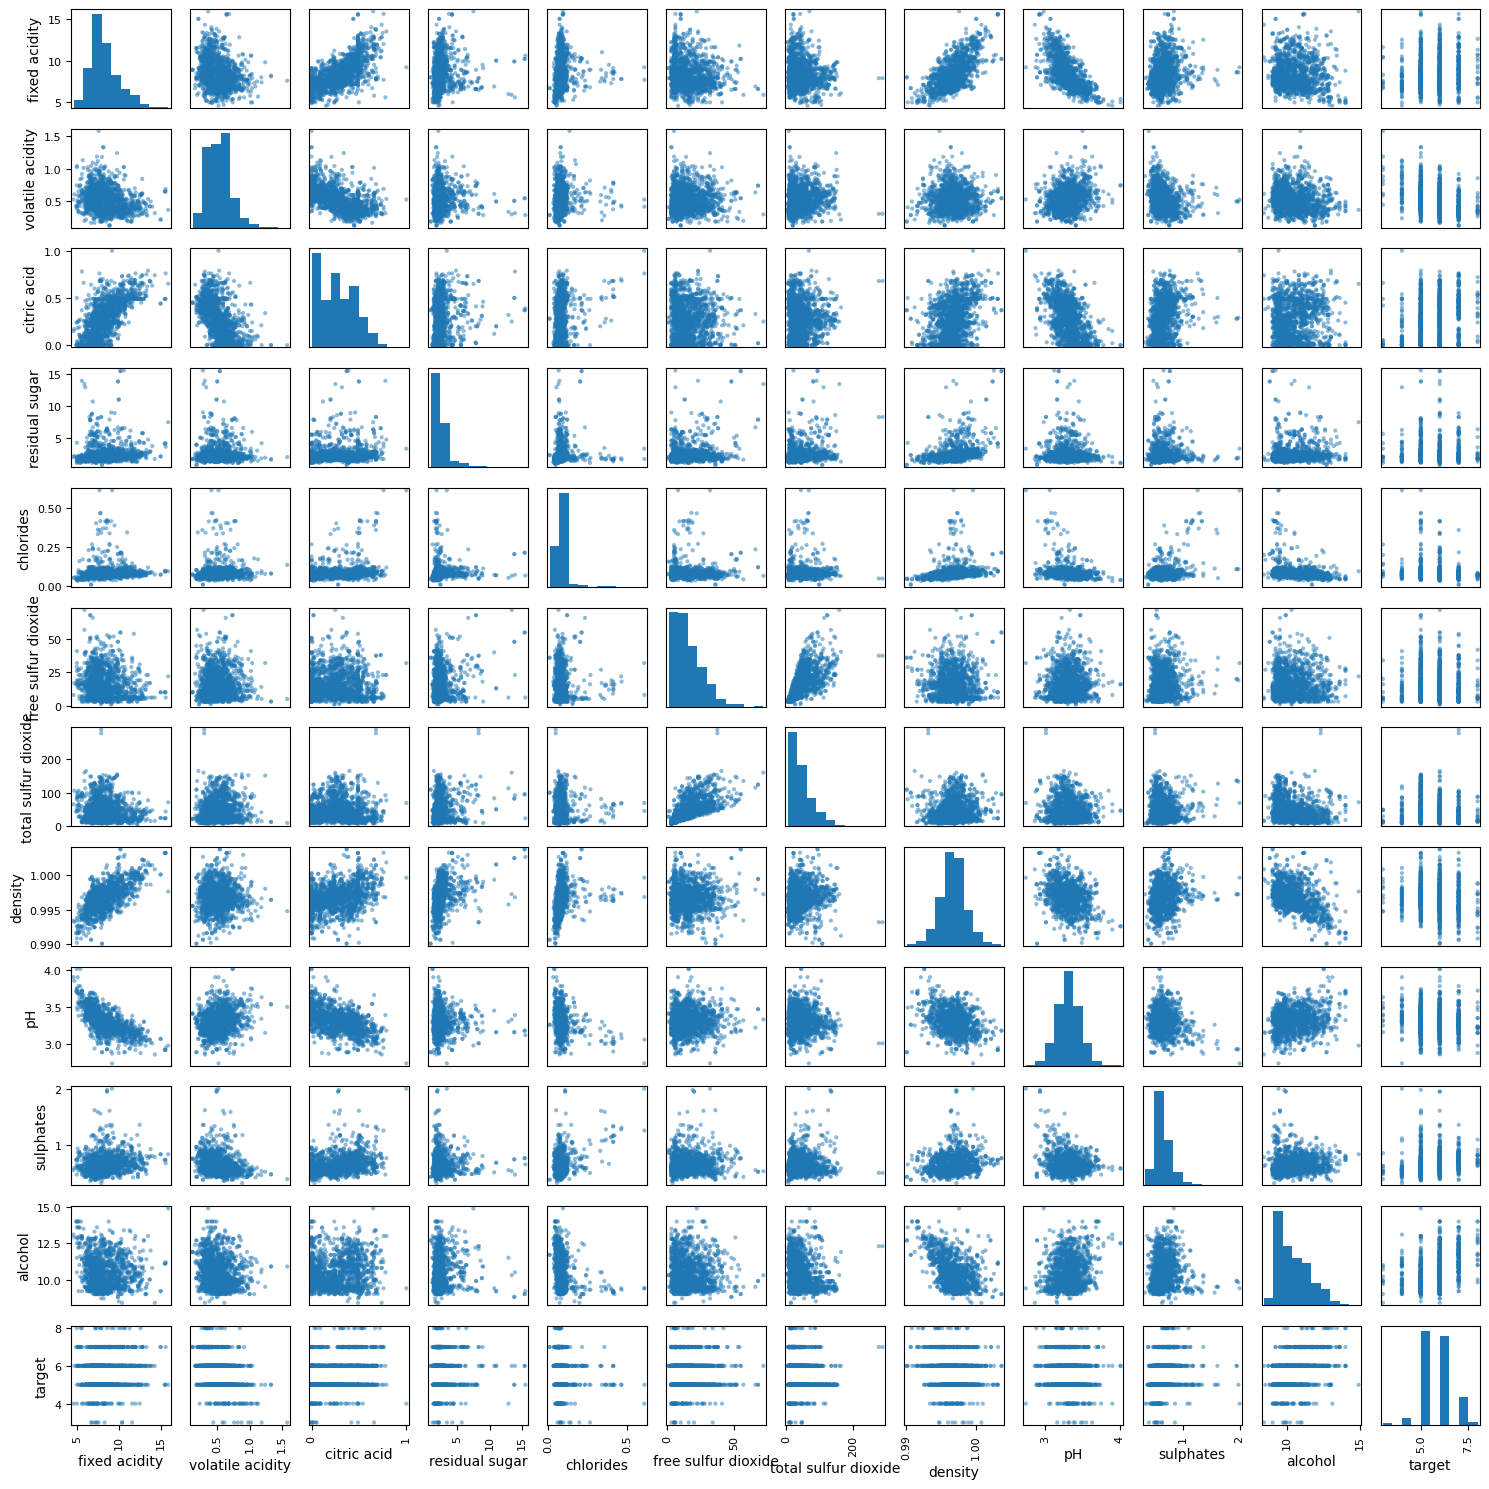

In [13]:
pd.plotting.scatter_matrix(df, figsize=(15, 15), diagonal='hist', alpha=0.5)
plt.tight_layout()
plt.show()

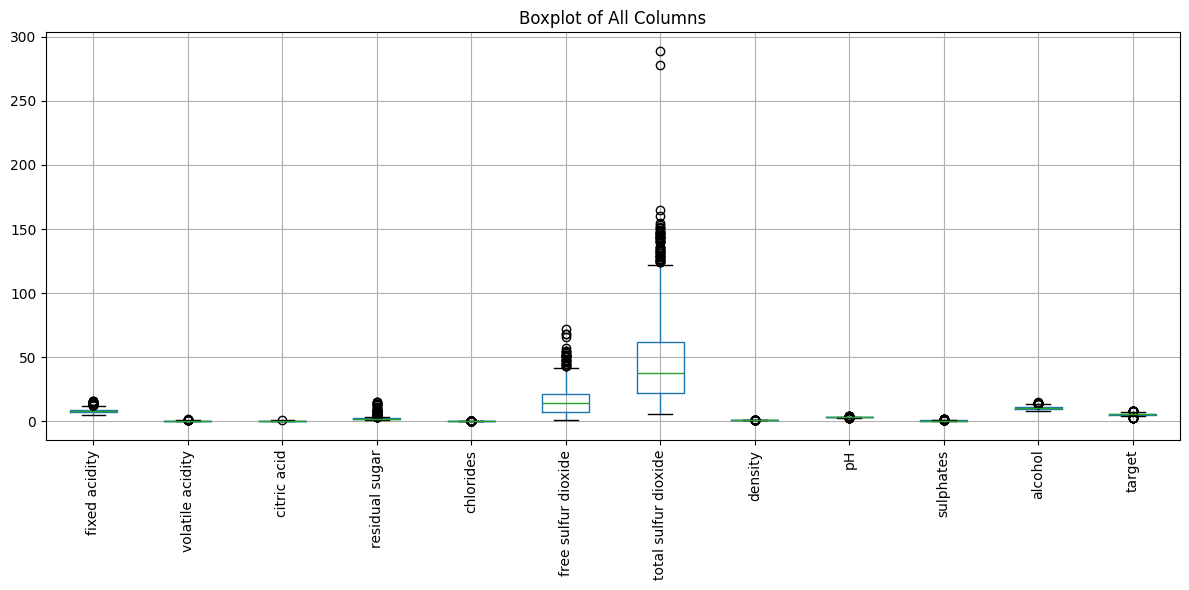

In [14]:
'''
The boxplot shows that a lot of the features have outliers, and some of them are way more spread out than others.
For example, total sulfur dioxide has a huge range compared to things like pH or chlorides. 
It also shows that most features are skewed, the medians arent sitting right in the middle.
Basically, the boxplot tells me which variables are tight and consistent versus which ones have extreme values that could affect the analysis or modeling.
'''

plt.figure(figsize=(12,6))
df.boxplot(rot=90)
plt.title("Boxplot of All Columns")
plt.tight_layout()
plt.show()

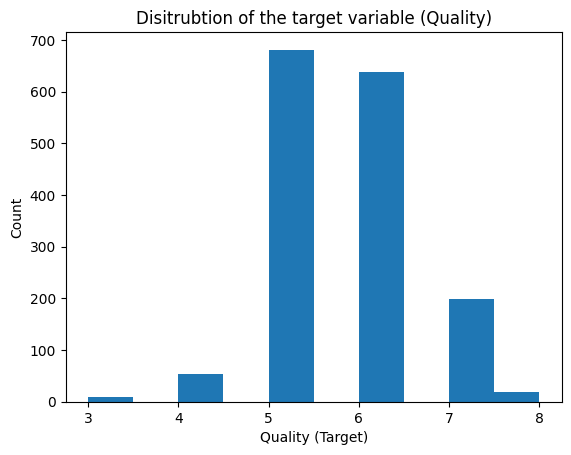

In [15]:
'''
This chart shows that most of the wines are rated 5 or 6, and there arent many wines at the lower or higher ends. 
So the dataset is basically centered around mid-quality wines. 
This tells me the data is imbalanced and most of the models learning will come from these middle categories.
'''
plt.hist(df['target'])
plt.title("Disitrubtion of the target variable (Quality)")
plt.xlabel("Quality (Target)")
plt.ylabel("Count");

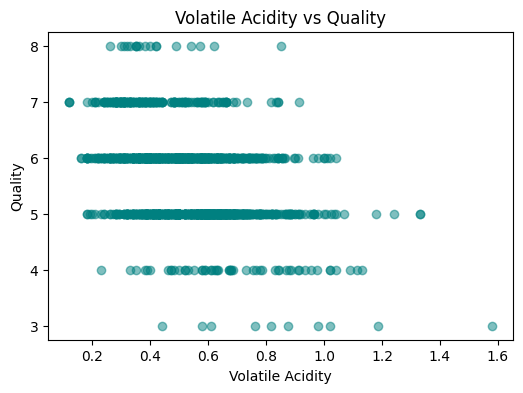

In [16]:
'''
This scatter plot stood out because it shows a clear negative trend. 
As volatile acidity goes up, the quality score usually drops. 
That makes sense because higher volatile acidity gives wine a stronger, vinegar like smell. So this feature is one of the strongest negative indicators of wine quality.
'''
plt.figure(figsize=(6,4))
plt.scatter(df["volatile acidity"], df["target"], alpha=0.5, color="teal")
plt.title("Volatile Acidity vs Quality")
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality")
plt.show()

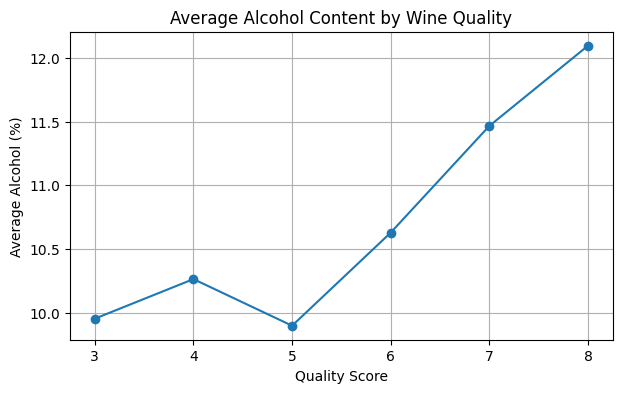

In [17]:
'''
This line graph shows that higher-quality wines tend to have higher alcohol levels on average. 
Its a consistent upward trend. This matches what I saw in the correlation matrix and the scatter plots. 
It basically confirms that alcohol content is one of the main drivers of wine quality in this dataset.
'''

mean_alcohol = df.groupby("target")["alcohol"].mean()

plt.figure(figsize=(7,4))
plt.plot(mean_alcohol.index, mean_alcohol.values, marker="o")
plt.title("Average Alcohol Content by Wine Quality")
plt.xlabel("Quality Score")
plt.ylabel("Average Alcohol (%)")
plt.grid(True)
plt.show()

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

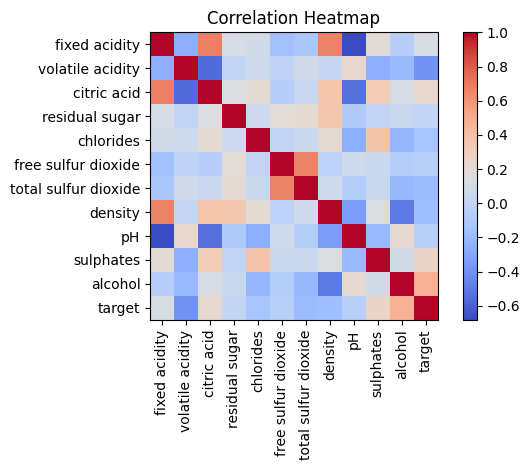

In [18]:
# YOUR CODE HERE
'''
The most strongly correlated pair is alcohol and quality (positive), meaning higher alcohol usually leads to higher scores. 
The strongest negative correlation is between volatile acidity and quality, higher volatile acidity tends to lower the wines rating.
'''
plt.imshow(df_corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df_corr.columns)), df_corr.columns, rotation=90)
plt.yticks(range(len(df_corr.columns)), df_corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE
Linear regresssion
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
https://www.datacamp.com/tutorial/sklearn-linear-regression





linear_model_ridge
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression




Random Forest Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
https://medium.com/@prathik.codes/mastering-randomforestregressor-in-scikit-learn-a-practical-guide-ba8615097100






YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE